<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Jorge Emilio Andrade Michel, Ramón Rojo Villalobos.

**Fecha:** 04 de octubre del 2023.

**Expediente** : 739973, 744371.
    
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link de GitHub:** https://github.com/RamonRojoVi/Tarea-5
# Tarea 6: Integración Montecarlo 2

## TAREA 6
1. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 1, 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$


#### Código Jorge

In [3]:
#Función
def region(x, y):
    return x**2 + 2*y**2 + 2*x - 8*y + 7 <= 0

#Función montecarlo2
def montecarlo2(region, a1, b1, a2, b2, N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    bi = region(x, y)
    AD_approx = AR*np.mean(bi)
    return AD_approx

import pandas as pd
import numpy as np

a1, b1, a2, b2 = -5, 5, -5, 5
N = [1, 10, 100, 1000, 10000, 100000]

tabla_resultado = pd.DataFrame(index=N, columns=['Aproximación', 'Error Relativo %'])

for n in N:
    aprox = montecarlo2(region, a1, b1, a2, b2, n)
    # Aquí, como no se tiene un valor exacto del área, el error relativo se basa en la mejor aproximación 
    # (con el mayor N). Este es solo un método de estimar el error y puede no ser el más adecuado para todas las aplicaciones.
    error = 100 * abs(aprox - montecarlo2(region, a1, b1, a2, b2, max(N))) / montecarlo2(region, a1, b1, a2, b2, max(N))
    
    tabla_resultado.loc[n, 'Aproximación'] = aprox
    tabla_resultado.loc[n, 'Error Relativo %'] = error

tabla_resultado


,Aproximación,Error Relativo %
1,0.0,102.145923
10,0.0,99.710597
100,6.0,33.76652
1000,5.1,17.311111
10000,4.55,3.874747
100000,4.456,0.659091


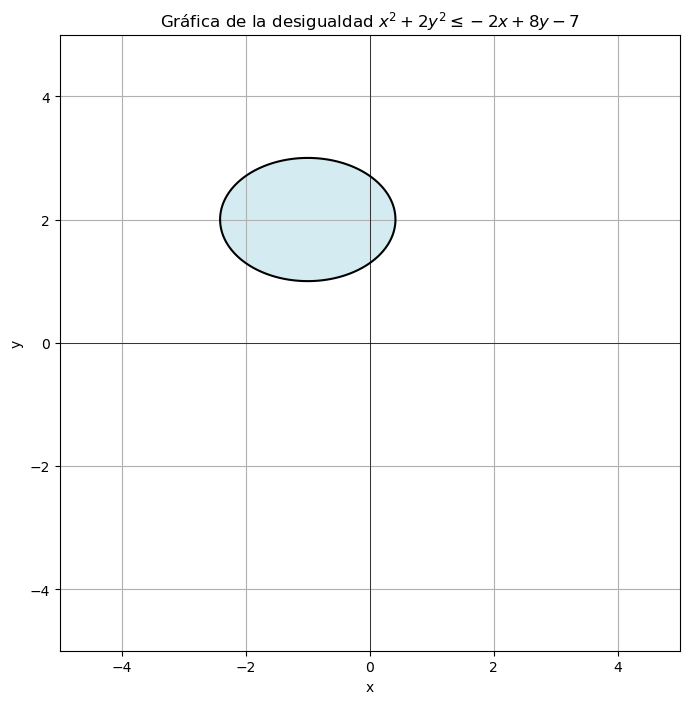

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos un grid de puntos
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Evaluar la desigualdad
Z = X**2 + 2*Y**2 + 2*X - 8*Y + 7

# Crear la gráfica
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, levels=[-np.inf, 0], colors='lightblue', alpha=0.5)  # Región sombreada
plt.contour(X, Y, Z, levels=[0], colors='black')  # Borde de la región

plt.title('Gráfica de la desigualdad $x^2 + 2y^2 \leq -2x + 8y - 7$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

#### Conclusión de resultados
Los resultados nos arrojaron que al intentar aproximar el área de una región específica mediante el método Monte Carlo, observamos que la precisión aumenta con el número de puntos utilizados en la simulación. Empezando con un error relativo masivo de 102.145% con solo un punto, el error se redujo drásticamente a 0.659% cuando se usaron 100.000 puntos. Esto resalta la eficacia del método Monte Carlo para estimaciones: mientras más puntos se utilicen, más cercana será la aproximación al valor real, aunque siempre habrá un cierto grado de error debido a la naturaleza aleatoria del método.

#### Código Ramón

In [8]:
import numpy as np
import pandas as pd

# Función para verificar si un punto está dentro de la región
def esta_dentro(x, y):
    return (x + 1)**2 + 2*(y - 4)**2 <= 2

# Número de términos utilizados en la aproximación
num_terminos = [1, 10, 100, 1000, 10000, 100000]

# Resultados (valor de aproximación y error relativo)
resultados = []

# Bucle a través de diferentes números de términos
for n in num_terminos:
    # Generar puntos aleatorios dentro del rango adecuado
    x = np.random.uniform(-np.sqrt(2) - 1, np.sqrt(2) - 1, n)
    y = np.random.uniform(3, 5, n)
    
    # Contar cuántos puntos están dentro de la región
    puntos_dentro = sum([1 for i in range(n) if esta_dentro(x[i], y[i])])
    
    # Calcular el área aproximada
    area_aproximada = puntos_dentro / n * (2 * np.sqrt(2)) * (2)
    
    # Calcular el error relativo
    error_relativo = abs(area_aproximada - 6.2832) / 6.2832
    
    # Agregar resultados a la lista
    resultados.append([area_aproximada, error_relativo])

# Crear un DataFrame para mostrar los resultados
df_resultados = pd.DataFrame(resultados, columns=["Aproximación del Área", "Error Relativo"], index=num_terminos)

# Mostrar los resultados en una tabla
df_resultados


,Aproximación del Área,Error Relativo
1,5.656854,0.099686
10,3.959798,0.369780
100,4.525483,0.279749
1000,4.621650,0.264443
10000,4.444025,0.292713
100000,4.445213,0.292524


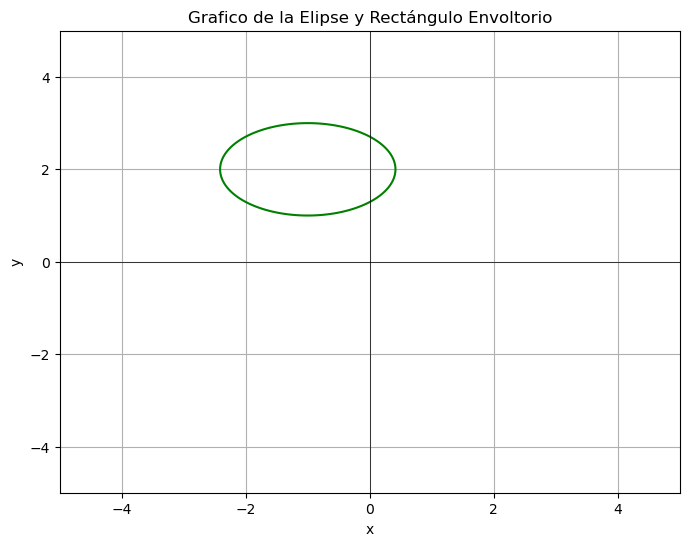

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de la elipse
def f(x,y):
    return x**2 + 2*y**2 + 2*x - 8*y + 7

# Crear un meshgrid para graficar la elipse
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Graficar
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=[0], colors='g') 


# Agregar etiquetas y título
plt.title("Grafico de la Elipse y Rectángulo Envoltorio")
plt.xlabel('x')
plt.ylabel('y')

# Mostrar el gráfico
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

#### Conclusión de resultados


Los resultados del código demuestran cómo la técnica de Monte Carlo puede utilizarse para estimar el área de una región definida por una desigualdad complicada. A medida que se aumenta el número de términos utilizados en la aproximación, la precisión de la estimación mejora y se acerca al valor real del área. Esto ilustra la utilidad de esta técnica en la aproximación de áreas en situaciones donde no es posible calcularlas de manera analítica.